# Color Pallet
Jakub Darul 

Lab4 - K-means

In [1]:
from lab2.img_utils import  load_all,get_X_y,get_points
from lab2.rounding_utils import round_means_and_std_devs
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pylab as pylab
import matplotlib.image as mimg
from sklearn.metrics import davies_bouldin_score
import numpy as np
np.seterr('ignore')
np.seterr(divide='ignore')
from typing import Optional,List,Dict,Tuple,Callable

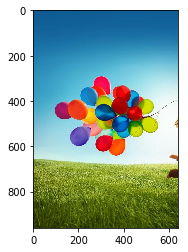

In [2]:
img =mimg.imread("pic.bmp")
plt.imshow(img)
plt.show()

In [3]:
P = img.reshape((-1,3))


In [4]:
# #TODO- check if that is correct:
# def median_index(indices:np.ndarray,cluster_points:np.ndarray)-> np.ndarray:
#     def dist_sq(a:np.ndarray,b:np.ndarray):
#         d = a-b
#         return (d*d).sum(axis=1)
#     print("indices: {}, cluster_points : {}".format(indices.shape,cluster_points.shape))
#     mean = np.mean(cluster_points,axis=0)
#     mean_repeated = np.ones(cluster_points.shape)* mean
    
#     delta = cluster_points - mean_repeated
#     min_projection_index = (delta * delta).sum(axis=1).argmin()
    
#     return indices[min_projection_index]

def median_index(indices:np.ndarray,cluster_points:np.ndarray)-> np.ndarray:
    def dist_sq(a:np.ndarray,b:np.ndarray):
        d = a-b
        return (d*d).sum(axis=1)
    print("indices: {}, cluster_points : {}".format(indices.shape,cluster_points.shape))
    mean = np.mean(cluster_points,axis=0)
    mean_repeated = np.ones(cluster_points.shape)* mean
    
    delta = cluster_points - mean_repeated
    min_projection_index = (delta * delta).sum(axis=1).argmin()
    
    return indices[min_projection_index]


def get_median_indices(k:int,points:np.ndarray,labels:np.ndarray)->List[int]:
    indices = np.arange(0,points.shape[0])
    
    median_indices =[]
    for label in range(k):
        mask = labels ==label
        cluster_pts = points[mask]
        cluster_indices = indices[mask]
        median_indices.append(median_index(cluster_indices,cluster_pts))
    return median_indices
        
        

def random_partition_labels(point_arr:np.ndarray,k:int)-> np.ndarray:
    return  np.random.randint(0,k,size=(point_arr.shape[0],))


def get_new_labels(points:np.ndarray,medoids_indices:List[int]):
#     points : n_pointsx3
    dist_from_medoids= []
    for medoid_index in medoids_indices:
        medoid_repeated = np.ones(points.shape)*points[medoid_index]
        
        delta = poins - medoid_repeated
        square_dist_from_medoid = (delta * delta).sum(axis=1)
        dist_from_medoids.append(square_dist_from_medoid)
    
    #dists: n_points x k
    dists = np.array(dist_from_medoids).transpose()
    return np.argmin(dists,axis=1)

In [5]:
class KMedians: #Euclidean
    def __init__(self,k:int):
        self.k = k
    
    def fit(self,points:np.ndarray):
        self.points= points
        self.labels = random_partition_labels(self.points,self.k)
        self.cluster_center_indices = get_median_indices(self.k,self.points,self.labels)
        self._prev_center_indices = None
        
        
    def __do_step(self):
        self._prev_center_indices = cluster_center_indices
        self.labels = get_new_labels(self.points,self.cluster_center_indices)
        self.cluster_center_indices = get_median_indices(self.k,self.points,self.labels)
        
    def _should_stop(self):
        return self._prev_center_indices == self.cluster_center_indices
        
    def run_it():
        while not self._should_stop:
            self.do_step()
            
    def cluster_centers(self):
        return self.points[self.cluster_center_indices]
        
    

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    by_hsv = ((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                    for name, color in colors.items())
    if sort_colors is True:
        by_hsv = sorted(by_hsv)
    names = [name for hsv, name in by_hsv]

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig


indices: (204540,), cluster_points : (204540, 3)
indices: (205445,), cluster_points : (205445, 3)
indices: (204415,), cluster_points : (204415, 3)


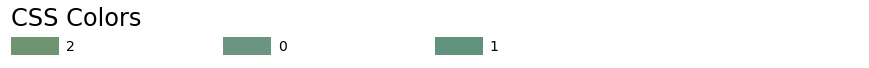

indices: (153264,), cluster_points : (153264, 3)
indices: (154355,), cluster_points : (154355, 3)
indices: (153455,), cluster_points : (153455, 3)
indices: (153326,), cluster_points : (153326, 3)


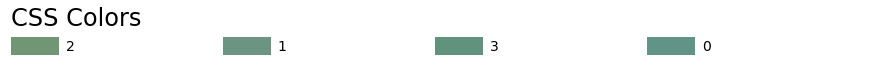

indices: (122937,), cluster_points : (122937, 3)
indices: (123144,), cluster_points : (123144, 3)
indices: (122616,), cluster_points : (122616, 3)
indices: (122852,), cluster_points : (122852, 3)
indices: (122851,), cluster_points : (122851, 3)


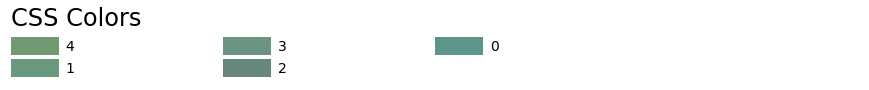

indices: (102539,), cluster_points : (102539, 3)
indices: (102574,), cluster_points : (102574, 3)
indices: (102021,), cluster_points : (102021, 3)
indices: (102016,), cluster_points : (102016, 3)
indices: (102622,), cluster_points : (102622, 3)
indices: (102628,), cluster_points : (102628, 3)


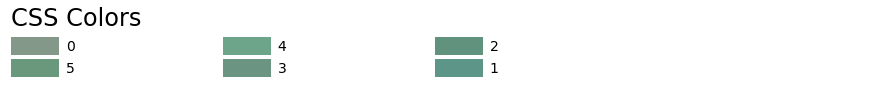

indices: (88062,), cluster_points : (88062, 3)
indices: (88023,), cluster_points : (88023, 3)
indices: (87830,), cluster_points : (87830, 3)
indices: (87979,), cluster_points : (87979, 3)
indices: (87405,), cluster_points : (87405, 3)
indices: (87351,), cluster_points : (87351, 3)
indices: (87750,), cluster_points : (87750, 3)


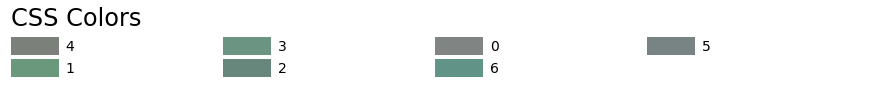

indices: (76678,), cluster_points : (76678, 3)
indices: (75995,), cluster_points : (75995, 3)
indices: (77301,), cluster_points : (77301, 3)
indices: (76364,), cluster_points : (76364, 3)
indices: (76913,), cluster_points : (76913, 3)
indices: (77290,), cluster_points : (77290, 3)
indices: (77204,), cluster_points : (77204, 3)
indices: (76655,), cluster_points : (76655, 3)


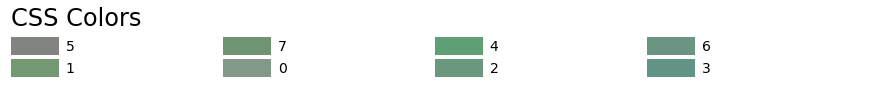

indices: (68247,), cluster_points : (68247, 3)
indices: (68176,), cluster_points : (68176, 3)
indices: (68257,), cluster_points : (68257, 3)
indices: (68388,), cluster_points : (68388, 3)
indices: (68258,), cluster_points : (68258, 3)
indices: (68250,), cluster_points : (68250, 3)
indices: (68128,), cluster_points : (68128, 3)
indices: (68329,), cluster_points : (68329, 3)
indices: (68367,), cluster_points : (68367, 3)


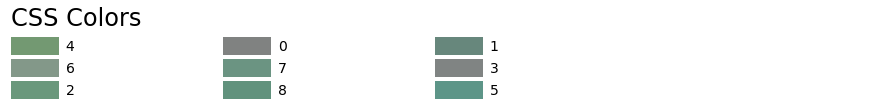

In [7]:
# plot_colortable(mcolors.BASE_COLORS, "Base Colors",
#                 sort_colors=False, emptycols=1)
# plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
#                 sort_colors=False, emptycols=2)

#sphinx_gallery_thumbnail_number = 3
for k in range(3,10):
    kmedians = KMedians(k)
    kmedians.fit(P)
    colors = kmedians.cluster_centers()
    plot_colortable({str(i):(color[0]/255,color[1]/255,color[2]/255) for i,color in enumerate(colors)}, "CSS Colors")
    plt.show()